In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
data = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pivot_catcherr.csv')
data.head()

,name,season_0,season_1,season_2,age_0,age_1,age_2,weight_0,weight_1,weight_2,...,yacK_0,yacK_1,yacK_2,td_points_0,td_points_1,td_points_2,compilation_0,compilation_1,compilation_2,compilation_3
0,A.J. Green,2011.0,2012.0,2013.0,23.0,24.0,25.0,205.0,205.0,205.0,...,81.219489,139.522963,123.114306,1.024475,1.897369,1.562539,53.006410,98.471570,82.935491,59.741763
1,A.J. Jenkins,2012.0,2013.0,2014.0,23.0,24.0,25.0,192.0,192.0,192.0,...,0.000000,16.276923,0.000000,0.000000,0.000000,0.000000,0.000000,0.597268,0.000000,0.000000
2,Aaron Brown,2009.0,2010.0,2011.0,24.0,25.0,26.0,196.0,196.0,196.0,...,84.000000,0.000000,0.000000,0.027441,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000
3,Aaron Halterman,2007.0,2008.0,2009.0,25.0,26.0,27.0,255.0,255.0,255.0,...,1.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000
4,Aaron Moorehead,2003.0,2004.0,2005.0,23.0,24.0,25.0,200.0,200.0,200.0,...,2.534653,1.285714,4.320000,0.000000,0.000000,0.000000,0.240777,0.025880,0.222518,0.274562


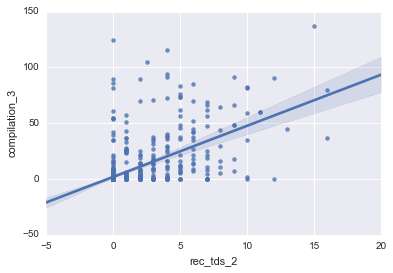

In [13]:
sns.regplot(data['rec_tds_2'], data['compilation_3'])
plt.show()

In [14]:
## creating a smaller dataframe with just the player name and the compilation 3 score
## to be used later to join with the PCA features
comp_df_cols = ['name', 'compilation_3']

comp_df = pd.DataFrame(data[comp_df_cols], columns = comp_df_cols)

In [15]:
comp_df.set_index(comp_df['name'], drop = True, inplace = True)
comp_df.drop('name', axis = 1, inplace = True)
comp_df

,compilation_3
name,
A.J. Green,59.741763
A.J. Jenkins,0.000000
Aaron Brown,0.000000
Aaron Halterman,0.000000
Aaron Moorehead,0.274562
Aaron Walker,0.000000
Adam Jennings,0.000000
Adrian Arrington,0.000000
Adrian Madise,0.000000


In [16]:
print data.columns

Index([u'name', u'season_0', u'season_1', u'season_2', u'age_0', u'age_1',
       u'age_2', u'weight_0', u'weight_1', u'weight_2',
       ...
       u'yacK_0', u'yacK_1', u'yacK_2', u'td_points_0', u'td_points_1',
       u'td_points_2', u'compilation_0', u'compilation_1', u'compilation_2',
       u'compilation_3'],
      dtype='object', length=148)


In [17]:
## I am dropping some of our engineered features since they will be co-linear with
## the other features that were used to create them

data.drop(['yacK_0', 'yacK_1', 'yacK_2', 'td_points_0', 'td_points_1', 'td_points_2', 'compilation_3'],
         axis = 1, inplace = True)
print data.columns

Index([u'name', u'season_0', u'season_1', u'season_2', u'age_0', u'age_1',
       u'age_2', u'weight_0', u'weight_1', u'weight_2',
       ...
       u'pct_of_team_passyards_2', u'pct_team_touchdowns_0',
       u'pct_team_touchdowns_1', u'pct_team_touchdowns_2', u'dropK_0',
       u'dropK_1', u'dropK_2', u'compilation_0', u'compilation_1',
       u'compilation_2'],
      dtype='object', length=141)


In [18]:
## the following loop will loop through every numeric column in the dataframe and 
## create a histogram of a random sample of that column and also perform a normal 
## test on that histogram

## the normal test sets the null hypothesis as "this sample comes from a normal distribution"
## so we would be able to accept that null hypothesis if the pvalue is greater than .05

## THIS IS BEING COMMENTED OUT BECAUSE IT TAKES A LONG TIME AND DOESNT NEED TO KEEP RUNNING


# import scipy
data_numeric = data[data.describe().columns]

# for i in data_numeric:
#     rand_sample = data_numeric[i].sample(100, random_state=6)
#     print i,':\n', scipy.stats.mstats.normaltest(rand_sample)
#     sns.distplot(data_numeric[i])
#     plt.xlabel(i)
#     plt.show()
#     print

In [19]:
## I will be performing PCA on all the numeric columns right now (data_numeric)

from sklearn import preprocessing

## standardizing all the columns

data_stand = preprocessing.StandardScaler().fit_transform(data_numeric)
data_stand

array([[ 1.4452578 ,  1.4452578 ,  1.4452578 , ...,  3.09351025,
         5.03178233,  4.09982337],
       [ 1.67020466,  1.67020466,  1.67020466, ..., -0.43101793,
        -0.39109615, -0.38144212],
       [ 0.99536407,  0.99536407,  0.99536407, ..., -0.3640458 ,
        -0.42418873, -0.38144212],
       ..., 
       [ 0.09557662,  0.09557662,  0.09557662, ..., -0.43101793,
        -0.42418873, -0.38144212],
       [-1.25410456, -1.25410456, -1.25410456, ..., -0.42327917,
        -0.42418873, -0.38144212],
       [-0.35431711, -0.35431711, -0.35431711, ..., -0.42224016,
        -0.42418873, -0.38144212]])

In [20]:
## creating the covariance matrix - this explains the variance between the different
## features within our dataframe

## for example, the value in the i,j position within the matrix explains the variance
## between the ith and the jth elements of a random vector, or between our features

cov_mat = np.cov(data_stand.T)

In [21]:
## creating my eigenvalues and corresponding eigenvectors

eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [22]:
print eigenValues 
print
print
print eigenVectors 

[  4.37289049e+01 +0.00000000e+00j   1.09913790e+01 +0.00000000e+00j
   6.86955197e+00 +0.00000000e+00j   6.69307571e+00 +0.00000000e+00j
   5.45476651e+00 +0.00000000e+00j   4.88067962e+00 +0.00000000e+00j
   4.22059484e+00 +0.00000000e+00j   3.91682606e+00 +0.00000000e+00j
   3.14748451e+00 +0.00000000e+00j   2.80978175e+00 +0.00000000e+00j
   2.61313119e+00 +0.00000000e+00j   2.28081461e+00 +0.00000000e+00j
   2.20357271e+00 +0.00000000e+00j   2.01780658e+00 +0.00000000e+00j
   1.75366185e+00 +0.00000000e+00j   1.63002592e+00 +0.00000000e+00j
   1.45244098e+00 +0.00000000e+00j   1.48976332e+00 +0.00000000e+00j
   1.37178631e+00 +0.00000000e+00j   1.29773634e+00 +0.00000000e+00j
   1.21465606e+00 +0.00000000e+00j   1.16561647e+00 +0.00000000e+00j
   1.10576912e+00 +0.00000000e+00j   1.06933611e+00 +0.00000000e+00j
   1.02471289e+00 +0.00000000e+00j   1.02972070e+00 +0.00000000e+00j
   9.86365879e-01 +0.00000000e+00j   9.69264170e-01 +0.00000000e+00j
   9.35630040e-01 +0.00000000e+00j

In [23]:
## creating the eigenpairs - just pairing the eigenvalue with its eigenvector
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

## sort in ascending order and then reverse to descending (for clarification's sake)
# eigenPairs.sort()
# eigenPairs.reverse()

## loop through the eigenpairs and printing out the first row (eigenvalue)
## this is also seen in the code block above but just wanted to loop through again
## as it is a bit more clear like this
## I am also creating a list of the eigenvalues in ascending order to be able to reference it
sort_values = []
for i in eigenPairs:
    print i[0]
    sort_values.append(i[0])


43.728904899
10.9913790261
6.86955196571
6.69307571475
5.45476650995
4.88067962135
4.2205948431
3.91682606328
3.14748450959
2.80978174762
2.6131311912
2.28081460568
2.20357270776
2.01780657737
1.75366185004
1.63002591781
1.45244097535
1.48976331678
1.37178630849
1.29773634305
1.21465605559
1.16561646534
1.10576911647
1.06933610994
1.02471289188
1.0297207013
0.986365878607
0.969264170349
0.935630040068
0.903178517829
0.87659444993
0.829487549651
0.799982275326
0.785962876924
0.736926753988
0.711622285974
0.68258411637
0.660820538555
0.624653988583
0.612557874692
0.576956029869
0.521880275888
0.544393854091
0.502688994004
0.46983840168
0.454159731963
0.44599137839
0.392002617592
0.382139950634
0.383741909764
0.351403948256
0.34215971458
0.324355291347
0.30740323771
0.29840967305
0.290043264559
0.266500794766
0.254421285667
0.252328531459
0.253059351538
0.231389365735
0.224045275456
0.21349015697
0.200566829571
0.191473865352
0.180155160671
0.174973175103
0.162680510189
0.162954033667
0.1

In [24]:
## we have the eigenvalues above showing us feature correlation explanation, but it helps
## to see the cumulative variance explained as well, which i can show below

## need to sum the eigen values to get percentages
sumEigenvalues = sum(eigenValues)

## this is a percentage explanation
variance_explained = [(i/sumEigenvalues)*100 for i in sort_values]
variance_explained

[(31.199112194493889+0j),
 (7.8419815954485408+0j),
 (4.9011957422440915+0j),
 (4.7752858351489724+0j),
 (3.8917936026947908+0j),
 (3.4822017940626204+0j),
 (3.0112533652883489+0j),
 (2.794524493050099+0j),
 (2.245625006433444+0j),
 (2.0046853720300972+0j),
 (1.8643817722294276+0j),
 (1.6272849947132202+0j),
 (1.5721754820254115+0j),
 (1.4396375564318968+0j),
 (1.2511791213819548+0j),
 (1.1629690157347576+0j),
 (1.0362680943060285+0j),
 (1.0628963375769822+0j),
 (0.97872368503514173+0j),
 (0.92589150949668497+0j),
 (0.86661650100081977+0j),
 (0.83162839229578478+0j),
 (0.7889293090166043+0j),
 (0.76293557647515864+0j),
 (0.731098401724112+0j),
 (0.73467130638632949+0j),
 (0.70373908934060847+0j),
 (0.69153759204967824+0j),
 (0.66754076417010799+0j),
 (0.6443876876058291+0j),
 (0.62542084361849304+0j),
 (0.59181164461480851+0j),
 (0.57076061747145657+0j),
 (0.56075824525000439+0j),
 (0.52577261035660572+0j),
 (0.50771871812223635+0j),
 (0.48700095458570691+0j),
 (0.47147336916874666+0j)

In [25]:
### based on the above results, it seems that sticking to 46 features would be a decent
## cutoff point since the variance explained per feature drops below .3%

## this can very easily be manipulated by changing n_components adn then adding/subtracting
## columns to the dataframe in the code block below

## instantiate
pca = PCA(n_components = 46)

## fit and transform the standardized data
pca_cols = pca.fit_transform(data_stand)

In [26]:
## Here I am simply creating the column headers for the pca features
pca_col_list = []

for i in range(1, 47):
    pca_col_list.append('pca'+str(i))
    

In [27]:
## going to organize the columns into dataframe for organization
pca_df = pd.DataFrame(pca_cols, columns = pca_col_list)

##previewing dataframe
print pca_df.shape
pca_df.head()

(872, 46)


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46
0,21.940232,-0.273040,-5.143762,0.400353,0.579912,-3.053696,-9.090618,5.587554,-0.956100,4.121112,...,-0.479869,0.588367,1.314024,-0.229976,0.006826,0.121385,1.108106,-1.374017,0.178848,-0.291364
1,-3.614746,3.985847,0.228036,2.177794,-1.957660,-1.767200,-2.502330,0.375744,-0.161812,-1.463644,...,-0.114185,-0.621525,-0.794002,-0.670242,-0.813285,0.094096,-0.009504,-0.449702,0.370183,-0.268940
2,-4.226397,-0.018708,-0.618810,2.418749,1.065766,1.288285,-1.578712,-0.399816,-1.064675,0.636101,...,-0.312504,0.303112,0.223409,0.255681,0.696370,-0.224999,0.123831,-0.256098,1.101123,-0.015976
3,-5.491295,-1.478589,-4.534280,-0.758447,-0.253120,-1.292149,0.346844,-0.565994,0.683009,0.765955,...,-0.329367,-0.245159,-0.201616,0.437306,0.034221,-0.225231,-0.047221,0.245316,0.020992,0.570963
4,-1.965899,1.164192,0.533666,-0.603330,-1.125110,1.671441,1.867247,0.186800,-0.624378,2.697424,...,0.229931,0.305412,-0.081750,-0.269752,-0.256919,0.135178,0.007598,-0.592970,-0.816511,0.199405


In [28]:
## We used all of our columns to perform the PCA so we only need to join the names back on
## since we would not want to build a model off of the PCA features as well as the 
## original features that were used to construct the PCA columns

## I am going to set the index of our pca dataframe to the names of the related player

pca_df.set_index(data['name'], drop = False, inplace = True)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,21.940232,-0.273040,-5.143762,0.400353,0.579912,-3.053696,-9.090618,5.587554,-0.956100,4.121112,...,-0.479869,0.588367,1.314024,-0.229976,0.006826,0.121385,1.108106,-1.374017,0.178848,-0.291364
A.J. Jenkins,-3.614746,3.985847,0.228036,2.177794,-1.957660,-1.767200,-2.502330,0.375744,-0.161812,-1.463644,...,-0.114185,-0.621525,-0.794002,-0.670242,-0.813285,0.094096,-0.009504,-0.449702,0.370183,-0.268940
Aaron Brown,-4.226397,-0.018708,-0.618810,2.418749,1.065766,1.288285,-1.578712,-0.399816,-1.064675,0.636101,...,-0.312504,0.303112,0.223409,0.255681,0.696370,-0.224999,0.123831,-0.256098,1.101123,-0.015976
Aaron Halterman,-5.491295,-1.478589,-4.534280,-0.758447,-0.253120,-1.292149,0.346844,-0.565994,0.683009,0.765955,...,-0.329367,-0.245159,-0.201616,0.437306,0.034221,-0.225231,-0.047221,0.245316,0.020992,0.570963
Aaron Moorehead,-1.965899,1.164192,0.533666,-0.603330,-1.125110,1.671441,1.867247,0.186800,-0.624378,2.697424,...,0.229931,0.305412,-0.081750,-0.269752,-0.256919,0.135178,0.007598,-0.592970,-0.816511,0.199405


In [29]:
joined_df = pca_df.join(comp_df)
joined_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,compilation_3
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,21.940232,-0.273040,-5.143762,0.400353,0.579912,-3.053696,-9.090618,5.587554,-0.956100,4.121112,...,0.588367,1.314024,-0.229976,0.006826,0.121385,1.108106,-1.374017,0.178848,-0.291364,59.741763
A.J. Jenkins,-3.614746,3.985847,0.228036,2.177794,-1.957660,-1.767200,-2.502330,0.375744,-0.161812,-1.463644,...,-0.621525,-0.794002,-0.670242,-0.813285,0.094096,-0.009504,-0.449702,0.370183,-0.268940,0.000000
Aaron Brown,-4.226397,-0.018708,-0.618810,2.418749,1.065766,1.288285,-1.578712,-0.399816,-1.064675,0.636101,...,0.303112,0.223409,0.255681,0.696370,-0.224999,0.123831,-0.256098,1.101123,-0.015976,0.000000
Aaron Halterman,-5.491295,-1.478589,-4.534280,-0.758447,-0.253120,-1.292149,0.346844,-0.565994,0.683009,0.765955,...,-0.245159,-0.201616,0.437306,0.034221,-0.225231,-0.047221,0.245316,0.020992,0.570963,0.000000
Aaron Moorehead,-1.965899,1.164192,0.533666,-0.603330,-1.125110,1.671441,1.867247,0.186800,-0.624378,2.697424,...,0.305412,-0.081750,-0.269752,-0.256919,0.135178,0.007598,-0.592970,-0.816511,0.199405,0.274562
Aaron Walker,-4.635299,-3.202939,-4.203424,-0.395837,-0.519062,-0.494584,0.770654,-1.585460,0.648878,2.314833,...,0.230227,-0.152988,0.088565,-0.172402,-0.091543,0.139378,-0.710051,0.166650,-0.320240,0.000000
Adam Jennings,-4.309037,-0.012229,1.431143,1.046693,0.624088,1.206161,-1.887762,-1.138909,-0.213144,0.931569,...,0.416792,0.240750,-0.095948,0.542211,-0.525172,0.346745,-0.625739,0.367444,-0.811080,0.000000
Adrian Arrington,-3.128835,1.300300,0.917167,2.026901,-2.593163,0.473414,-2.036897,-1.581394,-0.484225,2.870626,...,-0.105527,0.424974,-0.435456,-0.830936,1.710129,-0.579225,0.078126,-0.973753,-0.378462,0.000000
Adrian Madise,-5.001689,-0.147596,-0.563562,-0.238612,1.300501,-0.323286,0.821168,1.310272,-0.016448,-1.223374,...,0.775441,0.455363,0.448036,0.702283,0.345569,0.460760,-0.233761,0.261758,-0.676215,0.000000


In [30]:
bins = [-1, 10, 30, 60, 200]
labels = ['below average', 'league_average', 'quality starter', 'all_pro']
joined_df['categories'] =  pd.cut(joined_df['compilation_3'], bins, labels=labels)
joined_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,compilation_3,categories
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,21.940232,-0.273040,-5.143762,0.400353,0.579912,-3.053696,-9.090618,5.587554,-0.956100,4.121112,...,1.314024,-0.229976,0.006826,0.121385,1.108106,-1.374017,0.178848,-0.291364,59.741763,quality starter
A.J. Jenkins,-3.614746,3.985847,0.228036,2.177794,-1.957660,-1.767200,-2.502330,0.375744,-0.161812,-1.463644,...,-0.794002,-0.670242,-0.813285,0.094096,-0.009504,-0.449702,0.370183,-0.268940,0.000000,below average
Aaron Brown,-4.226397,-0.018708,-0.618810,2.418749,1.065766,1.288285,-1.578712,-0.399816,-1.064675,0.636101,...,0.223409,0.255681,0.696370,-0.224999,0.123831,-0.256098,1.101123,-0.015976,0.000000,below average
Aaron Halterman,-5.491295,-1.478589,-4.534280,-0.758447,-0.253120,-1.292149,0.346844,-0.565994,0.683009,0.765955,...,-0.201616,0.437306,0.034221,-0.225231,-0.047221,0.245316,0.020992,0.570963,0.000000,below average
Aaron Moorehead,-1.965899,1.164192,0.533666,-0.603330,-1.125110,1.671441,1.867247,0.186800,-0.624378,2.697424,...,-0.081750,-0.269752,-0.256919,0.135178,0.007598,-0.592970,-0.816511,0.199405,0.274562,below average


In [31]:
## Now I will export this new dataframe as a CSV

joined_df.to_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pca_catcherr.csv')

In [32]:
joined_df.shape

(872, 48)

In [33]:
X = joined_df.drop(['compilation_3', 'categories'], axis = 1)
y = joined_df['categories']
print X.shape
print y.shape

(872, 46)
(872,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 11)
print X_train.shape
print y_train.shape
print
print X_test.shape
print y_test.shape

(610, 46)
(610,)

(262, 46)
(262,)


In [35]:
weighting = {'below average':1, 'league_average':3, 'quality starter':8, 'all_pro':1}

lr = LogisticRegression(penalty = 'l2', class_weight = weighting, C = 3, warm_start = True,
                       solver = 'lbfgs', multi_class = 'multinomial')

model = lr.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
print model.score(X_test, y_test)
print classification_report(y_test, y_pred_lr)

0.851145038168
             precision    recall  f1-score   support

    all_pro       0.36      0.40      0.38        10
below average       0.98      0.95      0.96       222
league_average       0.36      0.29      0.32        17
quality starter       0.18      0.31      0.23        13

avg / total       0.87      0.85      0.86       262



In [36]:
rf = RandomForestClassifier(n_estimators = 8)

rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print rf_model.score(X_test, y_test)
print classification_report(y_test, y_pred)

0.835877862595
             precision    recall  f1-score   support

    all_pro       0.25      0.10      0.14        10
below average       0.89      0.98      0.93       222
league_average       0.14      0.06      0.08        17
quality starter       0.00      0.00      0.00        13

avg / total       0.77      0.84      0.80       262



In [37]:
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print knn_model.score(X_test, y_test)
print classification_report(y_test, y_pred_knn)

0.854961832061
             precision    recall  f1-score   support

    all_pro       0.25      0.10      0.14        10
below average       0.87      1.00      0.93       222
league_average       0.00      0.00      0.00        17
quality starter       1.00      0.08      0.14        13

avg / total       0.80      0.85      0.80       262



In [38]:
ada = AdaBoostClassifier(lr, n_estimators = 100, algorithm = 'SAMME.R')

ada_model = ada.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print ada_model.score(X_test, y_test)
print classification_report(y_test, y_pred_lr)

0.782442748092
             precision    recall  f1-score   support

    all_pro       0.36      0.40      0.38        10
below average       0.98      0.95      0.96       222
league_average       0.36      0.29      0.32        17
quality starter       0.18      0.31      0.23        13

avg / total       0.87      0.85      0.86       262



In [39]:
from sklearn.svm import SVC

weighting = {'below average':.1, 'league_average':3, 'quality starter':10, 'all_pro':8}

svc = SVC(C = .7, class_weight = weighting, kernel = 'linear')

svc_model = svc.fit(X_train, y_train)
y_predsvc = svc_model.predict(X_test)
print svc_model.score(X_test, y_test)
print classification_report(y_test, y_predsvc)

0.889312977099
             precision    recall  f1-score   support

    all_pro       0.56      0.50      0.53        10
below average       0.99      0.97      0.98       222
league_average       0.46      0.35      0.40        17
quality starter       0.29      0.46      0.35        13

avg / total       0.90      0.89      0.89       262





# PCA with Refined Columns  



In [117]:
## reading in both my standard dataframe and my dataframe of pca columns

df = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pivot_catcherr.csv')
pca_df = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pca_catcherr.csv')


In [118]:
# Create an average starts column
df['avg_starts'] = (df.start_ratio_0 + df.start_ratio_1 + df.start_ratio_2) / 3

In [119]:
#Create a column that adds up a player's dpi yards and penaltys drawn
df['dpis'] = df.dpis_drawn_0 + df.dpis_drawn_1 + df.dpis_drawn_2
df['dpi_yards'] = df.dpi_yards_0 + df.dpi_yards_1 + df.dpi_yards_2

In [120]:
df.head()

,Unnamed: 0,name,season_0,season_1,season_2,age_0,age_1,age_2,weight_0,weight_1,...,td_points_2,compilation_0,compilation_1,compilation_2,compilation_3,avg_starts,dpis,dpi_yards,year_1_growth,year_2_growth
0,0,A.J. Green,2011.0,2012.0,2013.0,23.0,24.0,25.0,205.0,205.0,...,1.562539,53.006410,98.471570,82.935491,59.741763,1.000000,0.0,0.0,9.264454,-13.711468
1,1,A.J. Jenkins,2012.0,2013.0,2014.0,23.0,24.0,25.0,192.0,192.0,...,0.000000,0.000000,0.597268,0.000000,0.000000,0.020833,0.0,0.0,0.121706,-0.527123
2,2,Aaron Brown,2009.0,2010.0,2011.0,24.0,25.0,26.0,196.0,196.0,...,0.000000,1.007213,0.000000,0.000000,0.000000,0.044444,0.0,0.0,-0.205240,0.000000
3,3,Aaron Halterman,2007.0,2008.0,2009.0,25.0,26.0,27.0,255.0,255.0,...,0.000000,0.030196,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.006153,0.000000
4,4,Aaron Moorehead,2003.0,2004.0,2005.0,23.0,24.0,25.0,200.0,200.0,...,0.000000,0.240777,0.025880,0.222518,0.274562,0.000000,0.0,0.0,-0.043790,0.173544


In [121]:
## this is a list of the features without any first year data


features_no_year_1 = ['age_2', 'weight_2', 'bmi_2',
             'rush_y/a_1', 'rush_y/a_2',
             'receptions_1', 'receptions_2',
            'rec_yards_1','rec_yards_2', 'rec_tds_1',
            'rec_tds_2', 'ctch_pct_1', 'ctch_pct_2',
             'first_down_ctchpct_1',
            'first_down_ctchpct_2',  'long_ctch_1', 'long_ctch_2',
             'drops_1', 'drops_2',  'EYds_1', 'EYds_2',
            'DVOA_1', 'DVOA_2', 'height_inches_2', 'avg_starts', 'dpis', 'dpi_yards',
             'pct_team_tgts_1',
            'pct_team_tgts_2', 'compilation_0', 'compilation_1', 'compilation_2', 'yacK_2',
                     'year_1_growth', 'year_2_growth']



In [122]:
# Create categories for player season_3 ratings

bins = [-1, 10, 30, 65, 200]
labels = ['below average', 'league_average', 'quality starter', 'all_pro']
df['categories'] =  pd.cut(df['compilation_3'], bins, labels=labels)

In [123]:
## this shows us the average compilation score for players who had a score above zero
df[df.compilation_3 >0].compilation_3.mean()


21.092271280771303

In [124]:
from sklearn.preprocessing import scale

## going to create and scale a new data frame of just the feature columns we want to use
## for PCA

pca_df = df[features_no_year_1]
pca_df = scale(pca_df)

In [125]:
pca_df

array([[ -5.27906210e-01,  -2.62855188e-02,  -9.16902831e-01, ...,
          2.42689644e+00,   2.98260023e+00,  -9.99317837e-01],
       [ -5.27906210e-01,  -5.58379520e-01,  -4.81400207e-01, ...,
         -4.70875628e-01,  -3.88187856e-02,  -5.00621826e-05],
       [ -1.07125392e-01,  -3.94658289e-01,  -2.20098632e-01, ...,
         -4.70875628e-01,  -1.46865131e-01,   3.99016432e-02],
       ..., 
       [  1.99677870e+00,   1.81557833e+00,   1.43481134e+00, ...,
         -4.70875628e-01,  -7.90390350e-02,   3.99016432e-02],
       [ -1.07125392e-01,  -8.44891675e-01,  -8.73352569e-01, ...,
         -4.70875628e-01,  -8.68764718e-02,   3.99016432e-02],
       [ -5.27906210e-01,  -1.62256752e+00,  -1.74435782e+00, ...,
         -4.70875628e-01,  -8.79287234e-02,   3.99016432e-02]])

In [126]:
## creating the covariance matrix - this explains the variance between the different
## features within our dataframe

## for example, the value in the i,j position within the matrix explains the variance
## between the ith and the jth elements of a random vector, or between our features

cov_mat = np.cov(pca_df.T)
cov_mat

array([[ 1.00114811,  0.12990042,  0.15253995, ..., -0.12509332,
        -0.11212128, -0.06017518],
       [ 0.12990042,  1.00114811,  0.82397927, ..., -0.09279434,
        -0.05153909,  0.00836413],
       [ 0.15253995,  0.82397927,  1.00114811, ..., -0.05284286,
        -0.04388679,  0.02841428],
       ..., 
       [-0.12509332, -0.09279434, -0.05284286, ...,  1.00114811,
         0.24951524,  0.28879864],
       [-0.11212128, -0.05153909, -0.04388679, ...,  0.24951524,
         1.00114811, -0.31947325],
       [-0.06017518,  0.00836413,  0.02841428, ...,  0.28879864,
        -0.31947325,  1.00114811]])

In [127]:
## creating my eigenvalues and corresponding eigenvectors

eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [128]:
## creating the eigenpairs - just pairing the eigenvalue with its eigenvector
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

## sort in ascending order and then reverse to descending (for clarification's sake)
# eigenPairs.sort()
# eigenPairs.reverse()

## loop through the eigenpairs and printing out the first row (eigenvalue)
## this is also seen in the code block above but just wanted to loop through again
## as it is a bit more clear like this
## I am also creating a list of the eigenvalues in ascending order to be able to reference it
sort_values = []
for i in eigenPairs:
    print i[0]
    sort_values.append(i[0])

15.9865197402
3.10576302391
2.48750785344
1.64437554327
1.5082482694
1.22161235017
1.12754095358
1.04043249825
0.917719338057
0.830283111813
0.774969766868
0.649287636388
0.635009444538
0.542322868587
0.411381307014
0.349671073791
0.27083659808
0.235648595754
0.220396154743
0.185147723815
0.146134129701
0.140098615504
0.126960649577
0.121886591744
0.10632889429
0.0755289899866
0.0676389406711
0.042833506206
0.0310440818611
0.0179058773735
0.0118276498813
0.00601783703884
0.00130408143002
2.61085600818e-16
4.28869539558e-17


In [129]:
## we have the eigenvalues above showing us feature correlation explanation, but it helps
## to see the cumulative variance explained as well, which i can show below

## need to sum the eigen values to get percentages
sumEigenvalues = sum(eigenValues)

## this is a percentage explanation
variance_explained = [(i/sumEigenvalues)*100 for i in sort_values]
variance_explained

[45.623390215194057,
 8.8634324830546234,
 7.0990148766386234,
 4.6928279757215243,
 4.3043389339683182,
 3.4863183387866559,
 3.2178511486450652,
 2.9692552620561194,
 2.6190483074968038,
 2.3695170065164266,
 2.2116601144881005,
 1.8529801156421475,
 1.8122320648506187,
 1.5477169676910114,
 1.1740272556007287,
 0.997914499579868,
 0.77293144471667097,
 0.67250959011056166,
 0.62898116245422242,
 0.52838685269600427,
 0.41704727054263796,
 0.39982271986863827,
 0.36232872143235645,
 0.34784803869194869,
 0.30344844995639669,
 0.21554964049252959,
 0.19303249451025004,
 0.12224110060761589,
 0.088595659570868845,
 0.051100980315640143,
 0.033754531607644474,
 0.017174102427361799,
 0.0037216740679859675,
 7.4510340207373171e-16,
 1.2239363334052147e-16]

In [130]:
### based on the above results, it seems that sticking to 16 features would be a decent
## cutoff point since the variance explained per feature drops below 1%

## this can very easily be manipulated by changing n_components adn then adding/subtracting
## columns to the dataframe in the code block below

## instantiate
pca = PCA(n_components = 16)

## fit and transform the standardized data
pca_cols = pca.fit_transform(pca_df)

In [131]:
## Here I am simply creating the column headers for the pca features
pca_col_list = []

for i in range(1, 17):
    pca_col_list.append('pca'+str(i))

In [132]:
## going to organize the columns into dataframe for organization
pca_df = pd.DataFrame(pca_cols, columns = pca_col_list)

##previewing dataframe
print pca_df.shape
pca_df.head()

(872, 16)


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-12.892792,1.329578,-2.777141,-2.452978,4.338498,1.490638,-1.723164,-0.998773,1.914128,-0.843979,1.392522,-0.107002,2.699691,1.619266,-0.011533,-0.454178
1,1.453281,1.322052,1.236139,-0.516286,-0.147259,1.260387,0.431638,0.552503,0.359431,-0.644517,-0.239868,0.295308,0.189341,-0.064761,0.593146,0.396209
2,2.878190,-0.135445,0.220238,0.328004,0.900965,0.189693,-0.110739,-0.066989,0.169119,0.009064,-0.046800,0.146688,-0.367358,0.339924,-0.045357,0.059018
3,3.118955,-0.315891,-2.590588,-0.920189,-0.489418,-0.386888,0.172732,-0.148710,0.029566,-0.087971,-0.432581,-0.056638,0.114427,0.080593,-0.110085,-0.043237
4,0.969374,-0.251551,1.505049,-1.284337,-1.429740,0.975902,0.019919,-0.785061,0.796259,0.690721,-0.250392,0.428363,0.938047,-0.775258,-0.317561,0.039776


In [133]:
## We used all of our columns to perform the PCA so we only need to join the names back on
## since we would not want to build a model off of the PCA features as well as the 
## original features that were used to construct the PCA columns

## I am going to set the index of our pca dataframe to the names of the related player

pca_df.set_index(df['name'], drop = False, inplace = True)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
name,,,,,,,,,,,,,,,,
A.J. Green,-12.892792,1.329578,-2.777141,-2.452978,4.338498,1.490638,-1.723164,-0.998773,1.914128,-0.843979,1.392522,-0.107002,2.699691,1.619266,-0.011533,-0.454178
A.J. Jenkins,1.453281,1.322052,1.236139,-0.516286,-0.147259,1.260387,0.431638,0.552503,0.359431,-0.644517,-0.239868,0.295308,0.189341,-0.064761,0.593146,0.396209
Aaron Brown,2.878190,-0.135445,0.220238,0.328004,0.900965,0.189693,-0.110739,-0.066989,0.169119,0.009064,-0.046800,0.146688,-0.367358,0.339924,-0.045357,0.059018
Aaron Halterman,3.118955,-0.315891,-2.590588,-0.920189,-0.489418,-0.386888,0.172732,-0.148710,0.029566,-0.087971,-0.432581,-0.056638,0.114427,0.080593,-0.110085,-0.043237
Aaron Moorehead,0.969374,-0.251551,1.505049,-1.284337,-1.429740,0.975902,0.019919,-0.785061,0.796259,0.690721,-0.250392,0.428363,0.938047,-0.775258,-0.317561,0.039776


In [134]:
joined_df = pca_df.join(comp_df)
joined_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,compilation_3
name,,,,,,,,,,,,,,,,,
A.J. Green,-12.892792,1.329578,-2.777141,-2.452978,4.338498,1.490638,-1.723164,-0.998773,1.914128,-0.843979,1.392522,-0.107002,2.699691,1.619266,-0.011533,-0.454178,59.741763
A.J. Jenkins,1.453281,1.322052,1.236139,-0.516286,-0.147259,1.260387,0.431638,0.552503,0.359431,-0.644517,-0.239868,0.295308,0.189341,-0.064761,0.593146,0.396209,0.000000
Aaron Brown,2.878190,-0.135445,0.220238,0.328004,0.900965,0.189693,-0.110739,-0.066989,0.169119,0.009064,-0.046800,0.146688,-0.367358,0.339924,-0.045357,0.059018,0.000000
Aaron Halterman,3.118955,-0.315891,-2.590588,-0.920189,-0.489418,-0.386888,0.172732,-0.148710,0.029566,-0.087971,-0.432581,-0.056638,0.114427,0.080593,-0.110085,-0.043237,0.000000
Aaron Moorehead,0.969374,-0.251551,1.505049,-1.284337,-1.429740,0.975902,0.019919,-0.785061,0.796259,0.690721,-0.250392,0.428363,0.938047,-0.775258,-0.317561,0.039776,0.274562
Aaron Walker,3.013970,-0.269620,-2.625744,-0.677416,-0.563743,-0.237749,-0.003479,-0.395056,-0.028626,0.084283,-0.785045,-0.253703,0.542811,0.291671,-0.119224,-0.055124,0.000000
Adam Jennings,2.878849,-0.055542,0.901534,0.910277,1.473379,0.281649,0.093502,0.675676,-0.231557,0.465309,0.444792,0.298390,-0.428576,0.109878,-0.210936,0.135636,0.000000
Adrian Arrington,1.806616,1.056161,1.626470,-0.410156,-0.705266,2.228908,0.244692,-0.106920,0.104391,0.142290,-0.919345,-0.288578,0.954624,-0.460765,1.080136,-0.182419,0.000000
Adrian Madise,2.989113,-0.246314,-0.576047,-0.278871,0.665936,-0.257046,0.169049,0.620172,0.056011,-0.256014,0.637354,0.459049,-1.041793,-0.061517,0.004265,0.090552,0.000000


In [136]:
# Create categories for player season_3 ratings

bins = [-1, 10, 30, 65, 200]
labels = ['below average', 'league_average', 'quality starter', 'all_pro']
joined_df['categories'] =  pd.cut(joined_df['compilation_3'], bins, labels=labels)
joined_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,compilation_3,categories
name,,,,,,,,,,,,,,,,,,
A.J. Green,-12.892792,1.329578,-2.777141,-2.452978,4.338498,1.490638,-1.723164,-0.998773,1.914128,-0.843979,1.392522,-0.107002,2.699691,1.619266,-0.011533,-0.454178,59.741763,quality starter
A.J. Jenkins,1.453281,1.322052,1.236139,-0.516286,-0.147259,1.260387,0.431638,0.552503,0.359431,-0.644517,-0.239868,0.295308,0.189341,-0.064761,0.593146,0.396209,0.000000,below average
Aaron Brown,2.878190,-0.135445,0.220238,0.328004,0.900965,0.189693,-0.110739,-0.066989,0.169119,0.009064,-0.046800,0.146688,-0.367358,0.339924,-0.045357,0.059018,0.000000,below average
Aaron Halterman,3.118955,-0.315891,-2.590588,-0.920189,-0.489418,-0.386888,0.172732,-0.148710,0.029566,-0.087971,-0.432581,-0.056638,0.114427,0.080593,-0.110085,-0.043237,0.000000,below average
Aaron Moorehead,0.969374,-0.251551,1.505049,-1.284337,-1.429740,0.975902,0.019919,-0.785061,0.796259,0.690721,-0.250392,0.428363,0.938047,-0.775258,-0.317561,0.039776,0.274562,below average
Aaron Walker,3.013970,-0.269620,-2.625744,-0.677416,-0.563743,-0.237749,-0.003479,-0.395056,-0.028626,0.084283,-0.785045,-0.253703,0.542811,0.291671,-0.119224,-0.055124,0.000000,below average
Adam Jennings,2.878849,-0.055542,0.901534,0.910277,1.473379,0.281649,0.093502,0.675676,-0.231557,0.465309,0.444792,0.298390,-0.428576,0.109878,-0.210936,0.135636,0.000000,below average
Adrian Arrington,1.806616,1.056161,1.626470,-0.410156,-0.705266,2.228908,0.244692,-0.106920,0.104391,0.142290,-0.919345,-0.288578,0.954624,-0.460765,1.080136,-0.182419,0.000000,below average
Adrian Madise,2.989113,-0.246314,-0.576047,-0.278871,0.665936,-0.257046,0.169049,0.620172,0.056011,-0.256014,0.637354,0.459049,-1.041793,-0.061517,0.004265,0.090552,0.000000,below average


In [137]:
## i am splitting the compilation scores into bins to separate recievers into 'talent pools'

bins = [-1, 10, 30, 60, 200]
labels = ['below average', 'league_average', 'quality starter', 'all_pro']
joined_df['categories'] =  pd.cut(joined_df['compilation_3'], bins, labels=labels)
joined_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,compilation_3,categories
name,,,,,,,,,,,,,,,,,,
A.J. Green,-12.892792,1.329578,-2.777141,-2.452978,4.338498,1.490638,-1.723164,-0.998773,1.914128,-0.843979,1.392522,-0.107002,2.699691,1.619266,-0.011533,-0.454178,59.741763,quality starter
A.J. Jenkins,1.453281,1.322052,1.236139,-0.516286,-0.147259,1.260387,0.431638,0.552503,0.359431,-0.644517,-0.239868,0.295308,0.189341,-0.064761,0.593146,0.396209,0.000000,below average
Aaron Brown,2.878190,-0.135445,0.220238,0.328004,0.900965,0.189693,-0.110739,-0.066989,0.169119,0.009064,-0.046800,0.146688,-0.367358,0.339924,-0.045357,0.059018,0.000000,below average
Aaron Halterman,3.118955,-0.315891,-2.590588,-0.920189,-0.489418,-0.386888,0.172732,-0.148710,0.029566,-0.087971,-0.432581,-0.056638,0.114427,0.080593,-0.110085,-0.043237,0.000000,below average
Aaron Moorehead,0.969374,-0.251551,1.505049,-1.284337,-1.429740,0.975902,0.019919,-0.785061,0.796259,0.690721,-0.250392,0.428363,0.938047,-0.775258,-0.317561,0.039776,0.274562,below average


In [138]:
## setting my X and y in order to build a model off of the data

X = joined_df.drop(['compilation_3', 'categories'], axis = 1)
y = joined_df['categories']
print X.shape
print y.shape

(872, 16)
(872,)


In [139]:
# splitting data into train and test section
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 12)

In [140]:
## I am going to weigth each category to try to more accurately predict that bin
cat_weights = {'below average':1, 'league_average':5, 'quality starter':5, 'all_pro':.5}


In [141]:
## support vector machine classifier

svc = SVC(C = .3, class_weight=cat_weights, probability = True, kernel='poly', degree = 2)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
preds = svc.predict(X_test)
print classification_report(y_test, preds)

             precision    recall  f1-score   support

    all_pro       0.22      0.33      0.27        12
below average       0.92      0.92      0.92       295
league_average       0.26      0.32      0.29        19
quality starter       0.08      0.04      0.06        23

avg / total       0.80      0.81      0.80       349



In [142]:
cat_weights = {'below average':.4, 'league_average':3, 'quality starter':5, 'all_pro':4}

lr = LogisticRegression(C=1, solver = 'lbfgs', multi_class = 'multinomial', penalty='l2', class_weight = cat_weights, random_state=11)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
preds = lr.predict(X_test)
print classification_report(y_test, preds)

             precision    recall  f1-score   support

    all_pro       0.12      0.25      0.16        12
below average       0.97      0.85      0.91       295
league_average       0.12      0.26      0.17        19
quality starter       0.33      0.35      0.34        23

avg / total       0.86      0.77      0.81       349



In [143]:
cat_weights = {'below average':.4, 'league_average':5, 'quality starter':5, 'all_pro':2}


ab = AdaBoostClassifier(base_estimator = lr, n_estimators = 25, random_state=11)
ab.fit(X_train, y_train)
ab.score(X_test, y_test)
preds = ab.predict(X_test)
print classification_report(y_test, preds)
labels = svc.predict(X)

             precision    recall  f1-score   support

    all_pro       0.03      0.08      0.05        12
below average       0.97      0.60      0.74       295
league_average       0.10      0.32      0.15        19
quality starter       0.07      0.22      0.10        23

avg / total       0.83      0.54      0.64       349



# Linear Discriminant Analysis with Refined Features

In [144]:
## creating dataframe to perform LDA on
lda_df = df[features_no_year_1]
lda_df.head()

,age_2,weight_2,bmi_2,rush_y/a_1,rush_y/a_2,receptions_1,receptions_2,rec_yards_1,rec_yards_2,rec_tds_1,...,dpis,dpi_yards,pct_team_tgts_1,pct_team_tgts_2,compilation_0,compilation_1,compilation_2,yacK_2,year_1_growth,year_2_growth
0,25.0,205.0,25.0,9.5,0.0,97.0,98.0,1350.0,1426.0,11.0,...,0.0,0.0,0.287719,0.278997,53.006410,98.471570,82.935491,123.114306,9.264454,-13.711468
1,25.0,192.0,26.0,3.0,0.0,8.0,0.0,130.0,0.0,0.0,...,0.0,0.0,0.028716,0.000000,0.000000,0.597268,0.000000,0.000000,0.121706,-0.527123
2,26.0,196.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000,-0.205240,0.000000
3,27.0,255.0,30.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000,-0.006153,0.000000
4,25.0,200.0,25.0,0.0,0.0,1.0,7.0,7.0,75.0,0.0,...,0.0,0.0,0.004983,0.019892,0.240777,0.025880,0.222518,4.320000,-0.043790,0.173544


In [145]:
lda_df.set_index(df['name'], drop = False, inplace = True)
lda_df.head()

,age_2,weight_2,bmi_2,rush_y/a_1,rush_y/a_2,receptions_1,receptions_2,rec_yards_1,rec_yards_2,rec_tds_1,...,dpis,dpi_yards,pct_team_tgts_1,pct_team_tgts_2,compilation_0,compilation_1,compilation_2,yacK_2,year_1_growth,year_2_growth
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,25.0,205.0,25.0,9.5,0.0,97.0,98.0,1350.0,1426.0,11.0,...,0.0,0.0,0.287719,0.278997,53.006410,98.471570,82.935491,123.114306,9.264454,-13.711468
A.J. Jenkins,25.0,192.0,26.0,3.0,0.0,8.0,0.0,130.0,0.0,0.0,...,0.0,0.0,0.028716,0.000000,0.000000,0.597268,0.000000,0.000000,0.121706,-0.527123
Aaron Brown,26.0,196.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000,-0.205240,0.000000
Aaron Halterman,27.0,255.0,30.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000,-0.006153,0.000000
Aaron Moorehead,25.0,200.0,25.0,0.0,0.0,1.0,7.0,7.0,75.0,0.0,...,0.0,0.0,0.004983,0.019892,0.240777,0.025880,0.222518,4.320000,-0.043790,0.173544


In [146]:
joined_df = lda_df.join(comp_df)
joined_df.head()

,age_2,weight_2,bmi_2,rush_y/a_1,rush_y/a_2,receptions_1,receptions_2,rec_yards_1,rec_yards_2,rec_tds_1,...,dpi_yards,pct_team_tgts_1,pct_team_tgts_2,compilation_0,compilation_1,compilation_2,yacK_2,year_1_growth,year_2_growth,compilation_3
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,25.0,205.0,25.0,9.5,0.0,97.0,98.0,1350.0,1426.0,11.0,...,0.0,0.287719,0.278997,53.006410,98.471570,82.935491,123.114306,9.264454,-13.711468,59.741763
A.J. Jenkins,25.0,192.0,26.0,3.0,0.0,8.0,0.0,130.0,0.0,0.0,...,0.0,0.028716,0.000000,0.000000,0.597268,0.000000,0.000000,0.121706,-0.527123,0.000000
Aaron Brown,26.0,196.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000,-0.205240,0.000000,0.000000
Aaron Halterman,27.0,255.0,30.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000,-0.006153,0.000000,0.000000
Aaron Moorehead,25.0,200.0,25.0,0.0,0.0,1.0,7.0,7.0,75.0,0.0,...,0.0,0.004983,0.019892,0.240777,0.025880,0.222518,4.320000,-0.043790,0.173544,0.274562


In [147]:
# Create categories for player season_3 ratings

bins = [-1, 10, 30, 65, 200]
labels = ['below average', 'league_average', 'quality starter', 'all_pro']
joined_df['categories'] =  pd.cut(joined_df['compilation_3'], bins, labels=labels)
joined_df

,age_2,weight_2,bmi_2,rush_y/a_1,rush_y/a_2,receptions_1,receptions_2,rec_yards_1,rec_yards_2,rec_tds_1,...,pct_team_tgts_1,pct_team_tgts_2,compilation_0,compilation_1,compilation_2,yacK_2,year_1_growth,year_2_growth,compilation_3,categories
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,25.0,205.0,25.0,9.50,0.00,97.0,98.0,1350.0,1426.0,11.0,...,0.287719,0.278997,53.006410,98.471570,82.935491,123.114306,9.264454,-13.711468,59.741763,quality starter
A.J. Jenkins,25.0,192.0,26.0,3.00,0.00,8.0,0.0,130.0,0.0,0.0,...,0.028716,0.000000,0.000000,0.597268,0.000000,0.000000,0.121706,-0.527123,0.000000,below average
Aaron Brown,26.0,196.0,26.6,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000,-0.205240,0.000000,0.000000,below average
Aaron Halterman,27.0,255.0,30.2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000,-0.006153,0.000000,0.000000,below average
Aaron Moorehead,25.0,200.0,25.0,0.00,0.00,1.0,7.0,7.0,75.0,0.0,...,0.004983,0.019892,0.240777,0.025880,0.222518,4.320000,-0.043790,0.173544,0.274562,below average
Aaron Walker,28.0,252.0,29.1,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.412599,0.000000,0.000000,0.000000,-0.084075,0.000000,0.000000,below average
Adam Jennings,27.0,181.0,26.7,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.585068,0.000000,0.000000,0.000000,-0.119220,0.000000,0.000000,below average
Adrian Arrington,27.0,185.0,23.8,0.00,0.00,2.0,0.0,31.0,0.0,0.0,...,0.003906,0.000000,0.268449,0.066052,0.000000,0.000000,-0.041242,-0.058295,0.000000,below average
Adrian Madise,25.0,215.0,30.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.036275,0.000000,0.000000,0.000000,-0.007392,0.000000,0.000000,below average


In [148]:
from sklearn.lda import LDA

lda = LDA(n_components=4)

X = scale(joined_df.drop(['compilation_3', 'categories'], axis = 1))
y = joined_df['categories']

## fit and transform the standardized data
lda_cols = lda.fit_transform(X, y)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [149]:
lda_cols.shape

(872, 3)

In [150]:
lda_df = pd.DataFrame(lda_cols, columns = ['lda1', 'lda2', 'lda3'])

##previewing dataframe
print lda_df.shape
lda_df.head()

(872, 3)


,lda1,lda2,lda3
0,-6.634921,3.291505,1.375733
1,0.635289,0.550638,-0.565619
2,0.754742,0.433061,-0.036859
3,0.603528,0.359444,0.244934
4,0.259059,0.351373,0.003456


In [151]:
lda_df.set_index(df['name'], drop = False, inplace = True)
lda_df.head()

,lda1,lda2,lda3
name,,,
A.J. Green,-6.634921,3.291505,1.375733
A.J. Jenkins,0.635289,0.550638,-0.565619
Aaron Brown,0.754742,0.433061,-0.036859
Aaron Halterman,0.603528,0.359444,0.244934
Aaron Moorehead,0.259059,0.351373,0.003456


In [152]:
joined_df = lda_df.join(comp_df)
joined_df.head()

,lda1,lda2,lda3,compilation_3
name,,,,
A.J. Green,-6.634921,3.291505,1.375733,59.741763
A.J. Jenkins,0.635289,0.550638,-0.565619,0.000000
Aaron Brown,0.754742,0.433061,-0.036859,0.000000
Aaron Halterman,0.603528,0.359444,0.244934,0.000000
Aaron Moorehead,0.259059,0.351373,0.003456,0.274562


In [153]:
bins = [-1, 10, 30, 65, 200]
labels = ['below average', 'league_average', 'quality starter', 'all_pro']
joined_df['categories'] =  pd.cut(joined_df['compilation_3'], bins, labels=labels)
joined_df.head()

,lda1,lda2,lda3,compilation_3,categories
name,,,,,
A.J. Green,-6.634921,3.291505,1.375733,59.741763,quality starter
A.J. Jenkins,0.635289,0.550638,-0.565619,0.000000,below average
Aaron Brown,0.754742,0.433061,-0.036859,0.000000,below average
Aaron Halterman,0.603528,0.359444,0.244934,0.000000,below average
Aaron Moorehead,0.259059,0.351373,0.003456,0.274562,below average


In [154]:
## setting my X and y in order to build a model off of the data

X = joined_df.drop(['compilation_3', 'categories'], axis = 1)
y = joined_df['categories']
print X.shape
print y.shape

(872, 3)
(872,)


In [298]:
# splitting data into train and test section
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35)

In [299]:
## I am going to weigth each category to try to more accurately predict that bin
cat_weights = {'below average':1, 'league_average':8, 'quality starter':4, 'all_pro':5}

In [300]:
## support vector machine classifier

svc = SVC(C = .8, class_weight=cat_weights, probability = True, kernel='linear', degree = 1, shrinking = True)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
preds = svc.predict(X_test)
print classification_report(y_test, preds)
print recall_score(y_test, preds, average = 'macro')

             precision    recall  f1-score   support

    all_pro       0.36      0.45      0.40        11
below average       0.97      0.88      0.92       260
league_average       0.25      0.56      0.34        18
quality starter       0.41      0.41      0.41        17

avg / total       0.87      0.82      0.84       306

0.574697198227


In [209]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import recall_score

c_list = [x/10.0 for x in range(1, 31, 1)]

parameters = {'C':c_list, 'kernel':['rbf', 'linear', 'poly', 'sigmoid'], 'degree':range(1,7)}

svc = SVC(class_weight=cat_weights, probability = True)
gsv_svc = GridSearchCV(svc, param_grid = parameters, scoring = 'recall_macro', n_jobs = -1,
                      cv = 3, verbose = 1)

gsv_fit = gsv_svc.fit(X, y)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.3min finished


In [210]:
gsv_fit.best_estimator_

SVC(C=0.8, cache_size=200,
  class_weight={'league_average': 8, 'all_pro': 1, 'below average': 0.5, 'quality starter': 4},
  coef0=0.0, decision_function_shape=None, degree=1, gamma='auto',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [211]:
gsv_fit.best_score_

0.54226329969573728